# Combining ReacLib Rates with Electron Capture Tables

Here's an example of using tabulated weak rates from <cite data-cite-t="suzuki:2016">Suzuki et al. (2016)</cite> together with rates from the ReacLib database.

We'll build a network suitable for e-capture supernovae.

In [1]:
import pynucastro as pyna

First create a library from ReacLib using a set of nuclei.

In [2]:
reaclib_library = pyna.ReacLibLibrary()

all_nuclei = ["p", "he4",
              "ne20", "o20", "f20",
              "mg24", "al27", "o16",
              "si28", "s32", "p31"]
ecsn_library = reaclib_library.linking_nuclei(all_nuclei,with_reverse=True)

AttributeError: 'ReacLibLibrary' object has no attribute '_rates'

Here are the rates it chose

In [3]:
print(ecsn_library)

NameError: name 'ecsn_library' is not defined

Now let's specify the weak rates we want from <cite data-cite-t="suzuki:2016">Suzuki et al.</cite> -- these tables are included with pynucastro:

In [4]:
tabular_lib = pyna.TabularLibrary()

In [5]:
ecsn_tabular = tabular_lib.linking_nuclei(["f20", "o20", "ne20"])

Let's look at the rates

In [6]:
tr = ecsn_tabular.get_rates()
tr

[F20 ⟶ Ne20 + e⁻ + 𝜈,
 F20 + e⁻ ⟶ O20 + 𝜈,
 Ne20 + e⁻ ⟶ F20 + 𝜈,
 O20 ⟶ F20 + e⁻ + 𝜈]

These tables are in terms of $T$ and $\rho Y_e$.  We can easily plot the tabulated electron capture rates just like ReacLib rates:

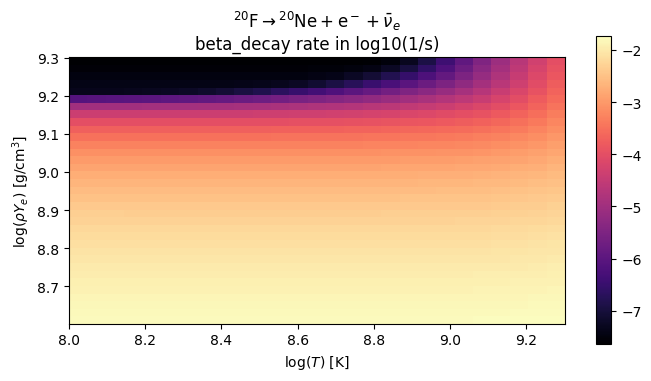

In [7]:
fig = tr[0].plot(rhoYmin=4.e8, rhoYmax=2.e9, Tmin=1.e8, Tmax=2.e9,
                 figsize=(8, 4))

Let's create a rate collection from just the ReacLib rates and look to see which are actually important

In [8]:
rc = pyna.RateCollection(libraries=[ecsn_library])

NameError: name 'ecsn_library' is not defined

Here we'll pick thermodynamic conditions appropriate to the oxygen burning shell in a white dwarf

In [9]:
comp = pyna.Composition(rc.get_nuclei())
comp.set_nuc("o16", 0.5)
comp.set_nuc("ne20", 0.3)
comp.set_nuc("mg24", 0.1)
comp.set_nuc("o20", 1.e-5)
comp.set_nuc("f20", 1.e-5)
comp.set_nuc("p", 1.e-5)
comp.set_nuc("he4", 1.e-2)
comp.set_nuc("al27", 1.e-2)
comp.set_nuc("si28", 1.e-2)
comp.set_nuc("s32", 1.e-2)
comp.set_nuc("p31", 1.e-2)
comp.normalize()

NameError: name 'rc' is not defined

In [10]:
fig = rc.plot(rho=7.e9, T=1.e9, comp=comp, ydot_cutoff_value=1.e-20)

NameError: name 'rc' is not defined

Note, this rate collection already includes some weak rates from ReacLib -- we want to remove those.

We'll also take the opportunity to remove any rates that are not important, by looking for a $|\dot{Y}| > 10^{-20}~s^{-1}$.

In [11]:
new_rate_list = []
ydots = rc.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)
for rate in rc.rates:
    if abs(ydots[rate]) >= 1.e-20 and not rate.weak:
        new_rate_list.append(rate)        

NameError: name 'rc' is not defined

Now let's add the tabular rates to this pruned down rate list

In [12]:
new_rate_list += tr

Finally, we'll create a new rate collection by combining this new list of rates with the list of tables:

In [13]:
rc_new = pyna.RateCollection(rates=new_rate_list)

AttributeError: 'Library' object has no attribute '_rates'

In [14]:
fig = rc_new.plot(rho=7.e9, T=1.e9, comp=comp, curved_edges=True, rotated=True)

NameError: name 'rc_new' is not defined

We can see the values of the rates at our thermodynamic conditions easily:

In [15]:
rc_new.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)

NameError: name 'rc_new' is not defined

Additionally, we can see the specific energy generation rate for these conditions

In [16]:
rc_new.evaluate_energy_generation(rho=7.e9, T=1.e9, composition=comp)

NameError: name 'rc_new' is not defined